In [1]:
from DataLoader import DataLoader, DataConcate
from sklearn.preprocessing import MinMaxScaler
from DataFiltering import DataFiltering

import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import os

DATA_EXPORT_PATH = "./data/exported/30sec/"

ecg_data_filtering = DataFiltering(sampling_rate=250)
scaler = MinMaxScaler()

# Data Concating

In [2]:
dataconcater = DataConcate()
dataloader = DataLoader()

data_list = os.listdir("./data/walking")
walking_data_list = ["./data/walking" + "/" + data for data in data_list]

data_list = os.listdir("./data/running")
running_data_list = ["./data/running" + "/" + data for data in data_list]

data_list = os.listdir("./data/sitting")
sitting_data_list = ["./data/sitting" + "/" + data for data in data_list]

## Walking data concating

In [3]:
walking_ecg_concate, walking_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in walking_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    walking_ecg_concate = np.concatenate((walking_ecg_concate, ecg), axis=0)
    walking_acc_concate = np.concatenate((walking_acc_concate, acc), axis=0)

walking_ecg_concate, walking_acc_concate = np.array(walking_ecg_concate[1:]), np.array(walking_acc_concate[1:])

print(np.shape(walking_ecg_concate))
print(np.shape(walking_acc_concate))

NON Mobile ./data/walking/ground_walking_test2.txt
NON Mobile ./data/walking/walking_test.txt
MOBILE ./data/walking/mobile_ground_walking_1.txt
MOBILE ./data/walking/mobile_ground_walking_2.txt
NON Mobile ./data/walking/ground_walking_test.txt
(696000,)
(69600,)


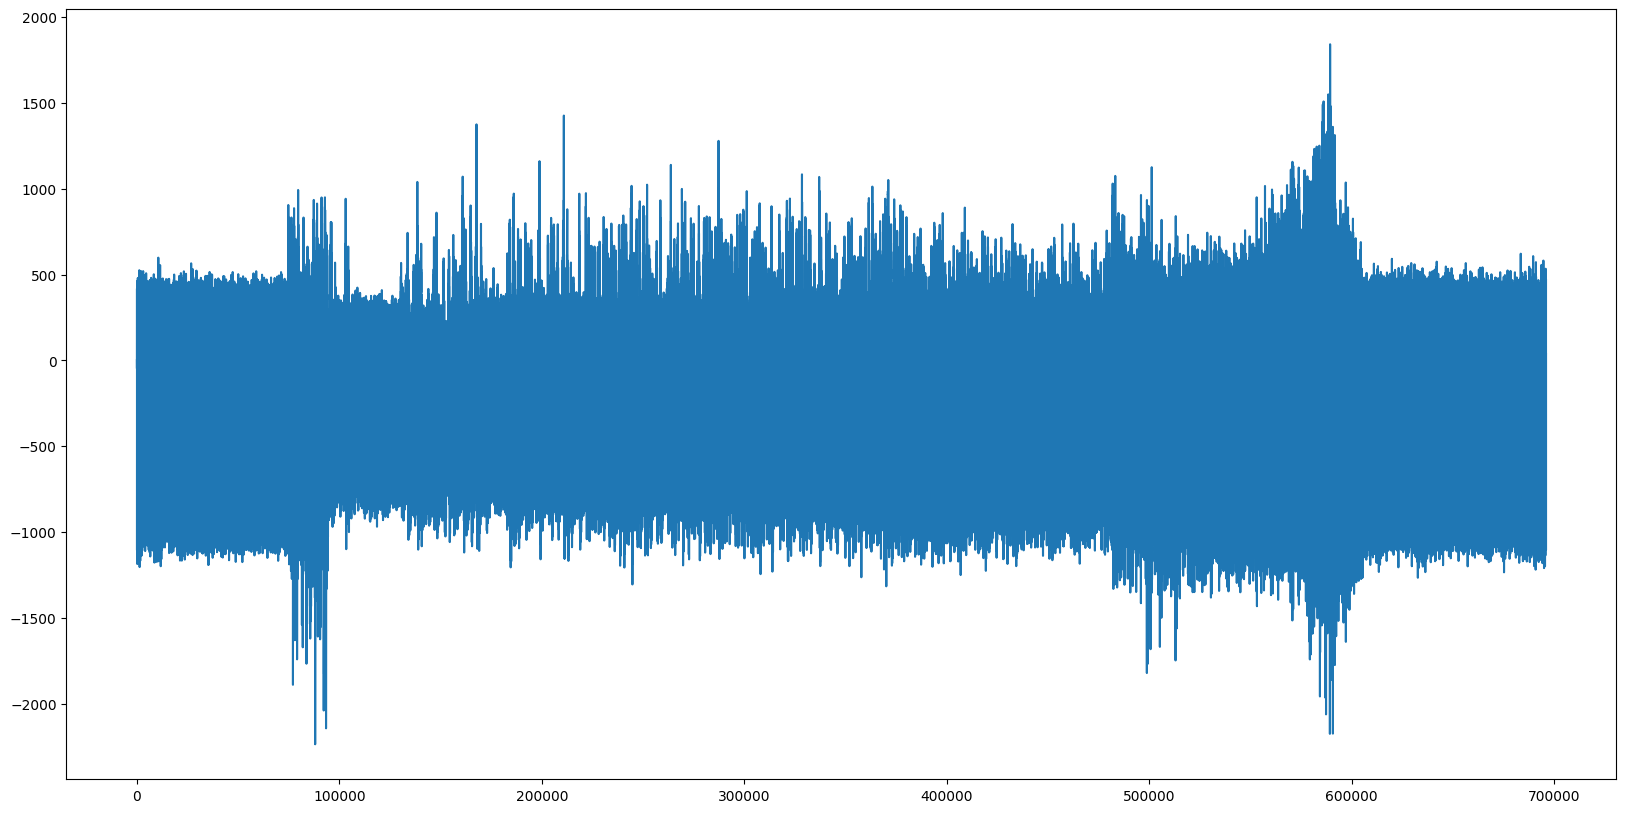

In [4]:
walking_ecg_filtered = ecg_data_filtering.bandstop_filter(walking_ecg_concate)

plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_filtered)
plt.show()

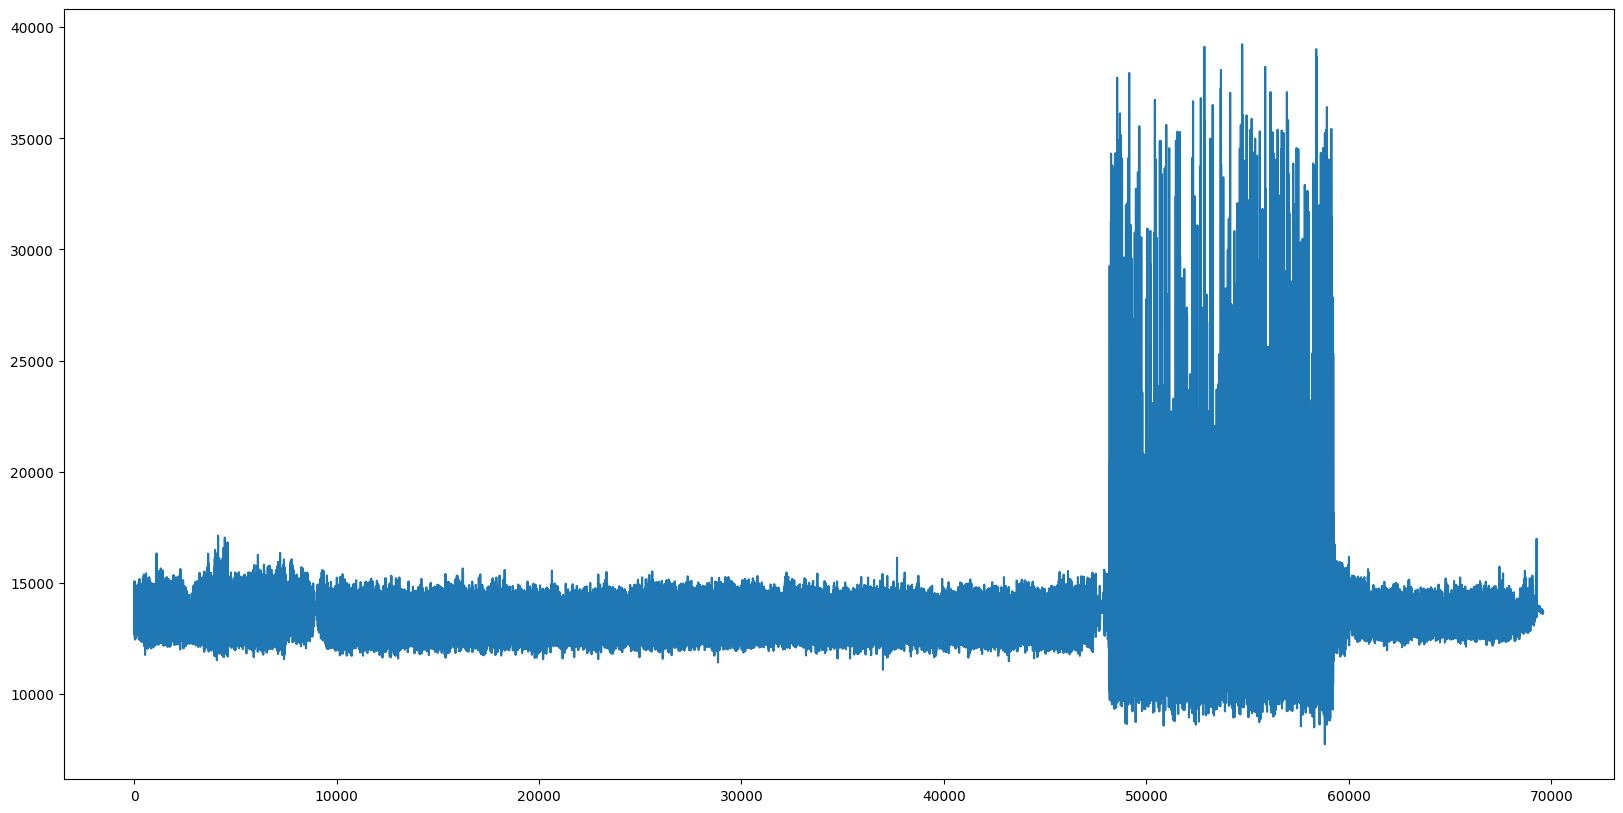

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(walking_acc_concate)
plt.show()

In [6]:
thirty_sec_walking_ecg = dataloader.export_ecg_30sec(walking_ecg_filtered)
thirty_sec_walking_acc = dataloader.export_acc_30sec(walking_acc_concate)

for idx in range(len(thirty_sec_walking_ecg)):
    print(f"{idx}th 1 minute walking ecg data shape:", end='')
    print(np.shape(thirty_sec_walking_ecg[idx]))

for idx in range(len(thirty_sec_walking_acc)):
    print(f"{idx}th 1 minute walking acc data shape:", end='')
    print(np.shape(thirty_sec_walking_acc[idx]))

0th 1 minute walking ecg data shape:(7500,)
1th 1 minute walking ecg data shape:(7500,)
2th 1 minute walking ecg data shape:(7500,)
3th 1 minute walking ecg data shape:(7500,)
4th 1 minute walking ecg data shape:(7500,)
5th 1 minute walking ecg data shape:(7500,)
6th 1 minute walking ecg data shape:(7500,)
7th 1 minute walking ecg data shape:(7500,)
8th 1 minute walking ecg data shape:(7500,)
9th 1 minute walking ecg data shape:(7500,)
10th 1 minute walking ecg data shape:(7500,)
11th 1 minute walking ecg data shape:(7500,)
12th 1 minute walking ecg data shape:(7500,)
13th 1 minute walking ecg data shape:(7500,)
14th 1 minute walking ecg data shape:(7500,)
15th 1 minute walking ecg data shape:(7500,)
16th 1 minute walking ecg data shape:(7500,)
17th 1 minute walking ecg data shape:(7500,)
18th 1 minute walking ecg data shape:(7500,)
19th 1 minute walking ecg data shape:(7500,)
20th 1 minute walking ecg data shape:(7500,)
21th 1 minute walking ecg data shape:(7500,)
22th 1 minute walkin

In [7]:
# Walking ECG
with gzip.open(DATA_EXPORT_PATH + "/walking_ecg.pkl", "wb") as f:
    pickle.dump(thirty_sec_walking_ecg, f)

# Walking ACC
with gzip.open(DATA_EXPORT_PATH + "/walking_acc.pkl", "wb") as f:
    pickle.dump(thirty_sec_walking_acc, f)

## Running data concating

In [8]:
running_ecg_concate, running_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in running_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    running_ecg_concate = np.concatenate((running_ecg_concate, ecg), axis=0)
    running_acc_concate = np.concatenate((running_acc_concate, acc), axis=0)

running_ecg_concate, running_acc_concate = np.array(running_ecg_concate[1:]), np.array(running_acc_concate[1:])

print(np.shape(running_ecg_concate))
print(np.shape(running_acc_concate))

MOBILE ./data/running/mobile_ground_running_1.txt
NON Mobile ./data/running/machine_running_test2.txt
NON Mobile ./data/running/machine_running_test1.txt
(304900,)
(30490,)


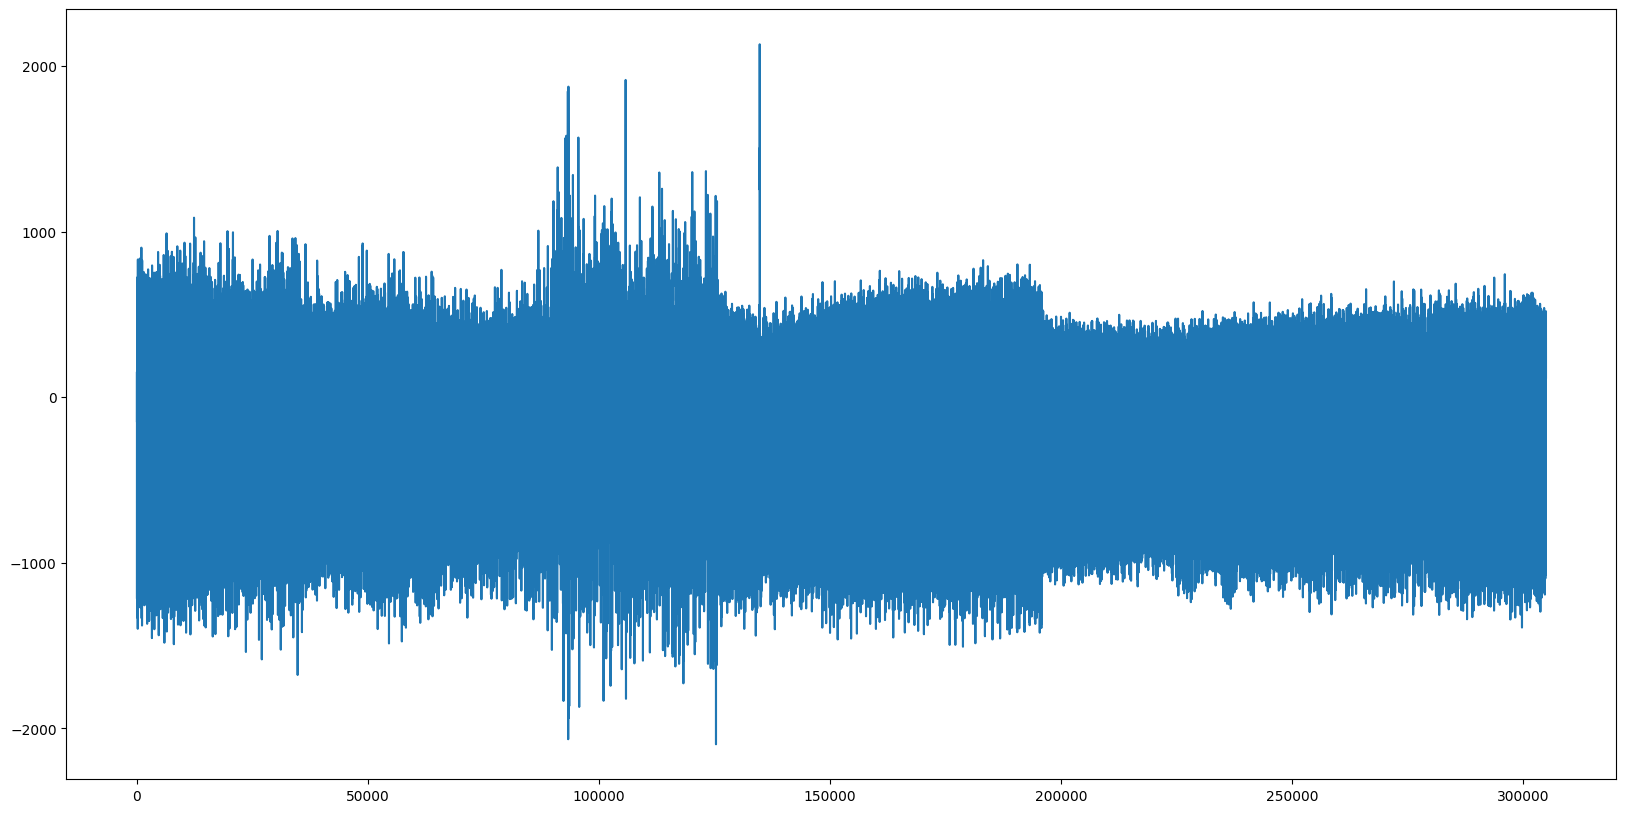

In [9]:
running_ecg_filtered = ecg_data_filtering.bandstop_filter(running_ecg_concate)

plt.figure(figsize=(20, 10))
plt.plot(running_ecg_filtered)
plt.show()

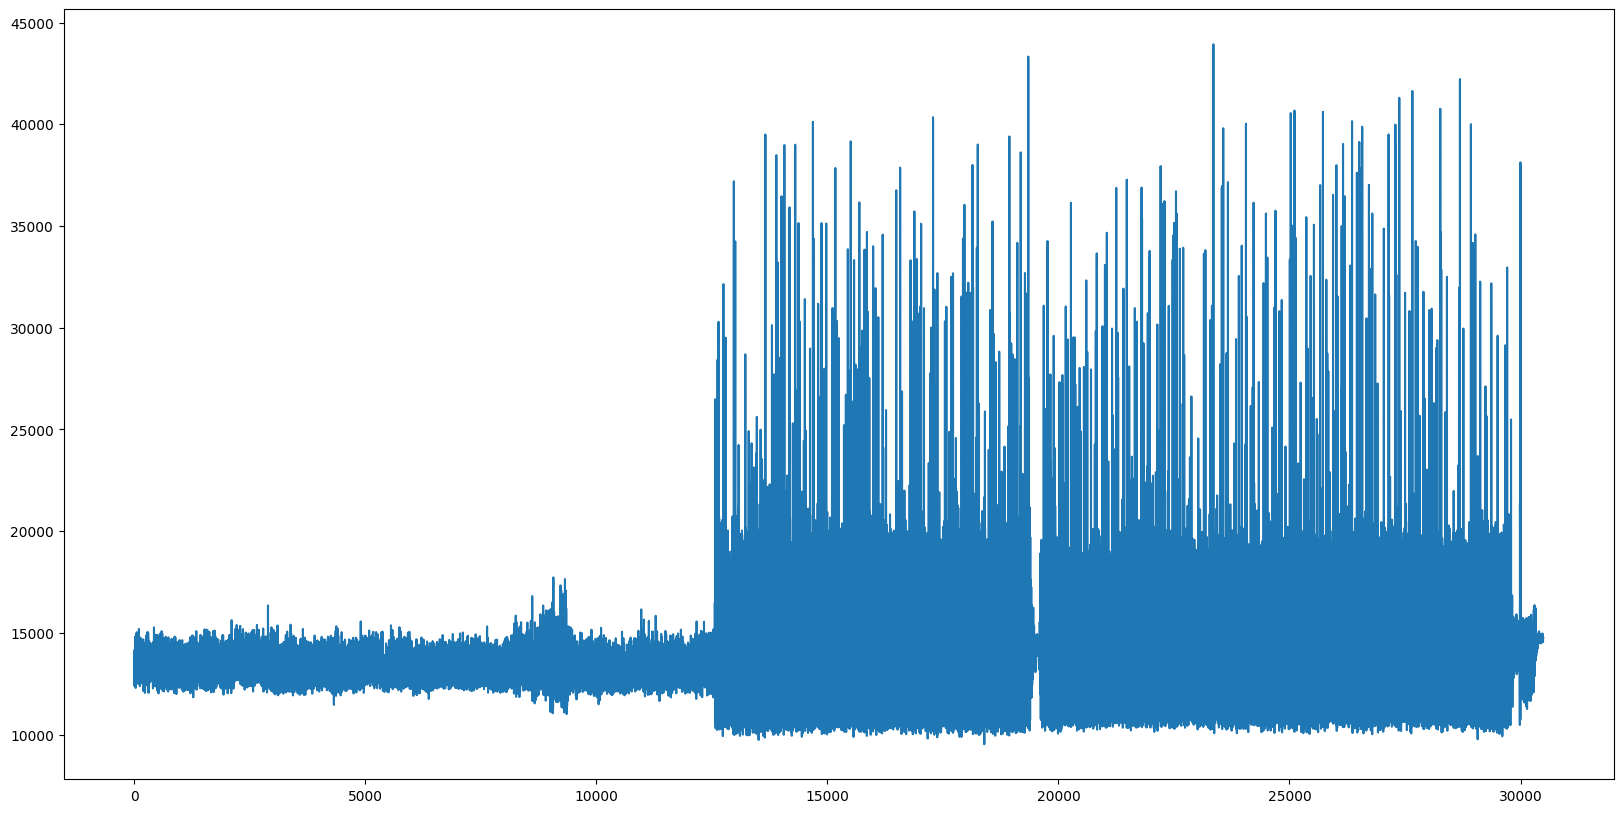

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(running_acc_concate)
plt.show()

In [11]:
thirty_sec_running_ecg = dataloader.export_ecg_30sec(running_ecg_filtered)
thirty_sec_running_acc = dataloader.export_acc_30sec(running_acc_concate)

for idx in range(len(thirty_sec_running_ecg)):
    print(f"{idx}th ECG data shape : ", end='')
    print(np.shape(thirty_sec_running_ecg[idx]))

for idx in range(len(thirty_sec_running_acc)):
    print(f"{idx}th ACC data shape : ", end='')
    print(np.shape(thirty_sec_running_acc[idx]))

0th ECG data shape : (7500,)
1th ECG data shape : (7500,)
2th ECG data shape : (7500,)
3th ECG data shape : (7500,)
4th ECG data shape : (7500,)
5th ECG data shape : (7500,)
6th ECG data shape : (7500,)
7th ECG data shape : (7500,)
8th ECG data shape : (7500,)
9th ECG data shape : (7500,)
10th ECG data shape : (7500,)
11th ECG data shape : (7500,)
12th ECG data shape : (7500,)
13th ECG data shape : (7500,)
14th ECG data shape : (7500,)
15th ECG data shape : (7500,)
16th ECG data shape : (7500,)
17th ECG data shape : (7500,)
18th ECG data shape : (7500,)
19th ECG data shape : (7500,)
20th ECG data shape : (7500,)
21th ECG data shape : (7500,)
22th ECG data shape : (7500,)
23th ECG data shape : (7500,)
24th ECG data shape : (7500,)
25th ECG data shape : (7500,)
26th ECG data shape : (7500,)
27th ECG data shape : (7500,)
28th ECG data shape : (7500,)
29th ECG data shape : (7500,)
30th ECG data shape : (7500,)
31th ECG data shape : (7500,)
32th ECG data shape : (7500,)
33th ECG data shape 

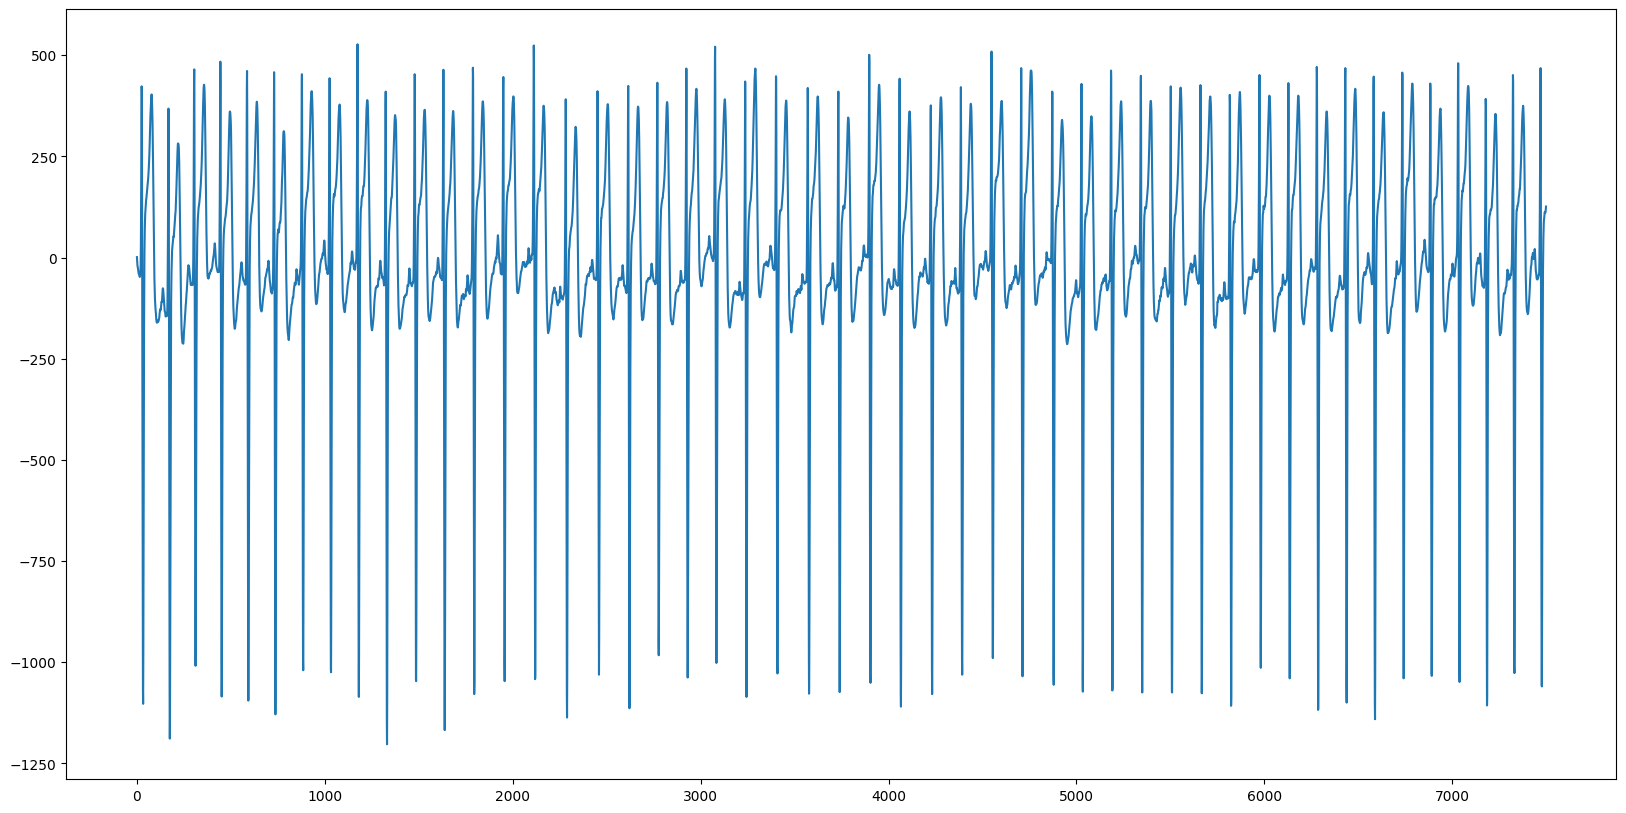

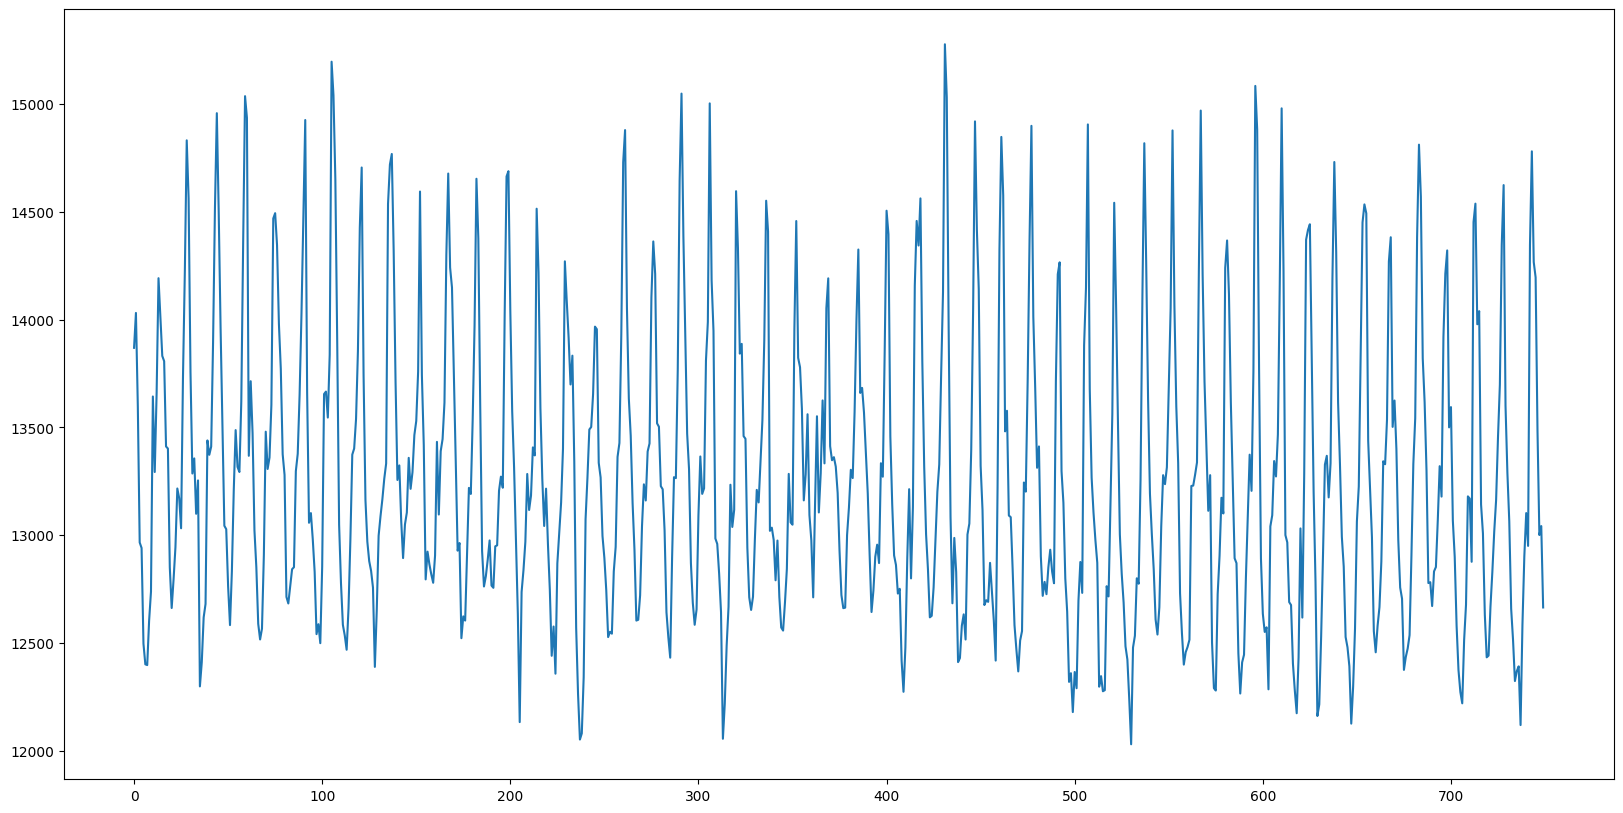

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(thirty_sec_running_ecg[0])
plt.show()

# Accelometer data visualization
plt.figure(figsize=(20, 10))
plt.plot(thirty_sec_running_acc[0])
plt.show()

In [13]:
# Running ECG
with gzip.open(DATA_EXPORT_PATH + "/running_ecg.pkl", "wb") as f:
    pickle.dump(thirty_sec_running_ecg, f)

# Running ACC
with gzip.open(DATA_EXPORT_PATH + "/running_acc.pkl", "wb") as f:
    pickle.dump(thirty_sec_running_acc, f)

## Sitting data concating

In [14]:
sitting_ecg_concate, sitting_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in sitting_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    sitting_ecg_concate = np.concatenate((sitting_ecg_concate, ecg), axis=0)
    sitting_acc_concate = np.concatenate((sitting_acc_concate, acc), axis=0)

sitting_ecg_concate, sitting_acc_concate = np.array(sitting_ecg_concate[1:]), np.array(sitting_acc_concate[1:])

print(np.shape(sitting_ecg_concate))
print(np.shape(sitting_acc_concate))

NON Mobile ./data/sitting/relax_sitting_status.txt
(230650,)
(23065,)


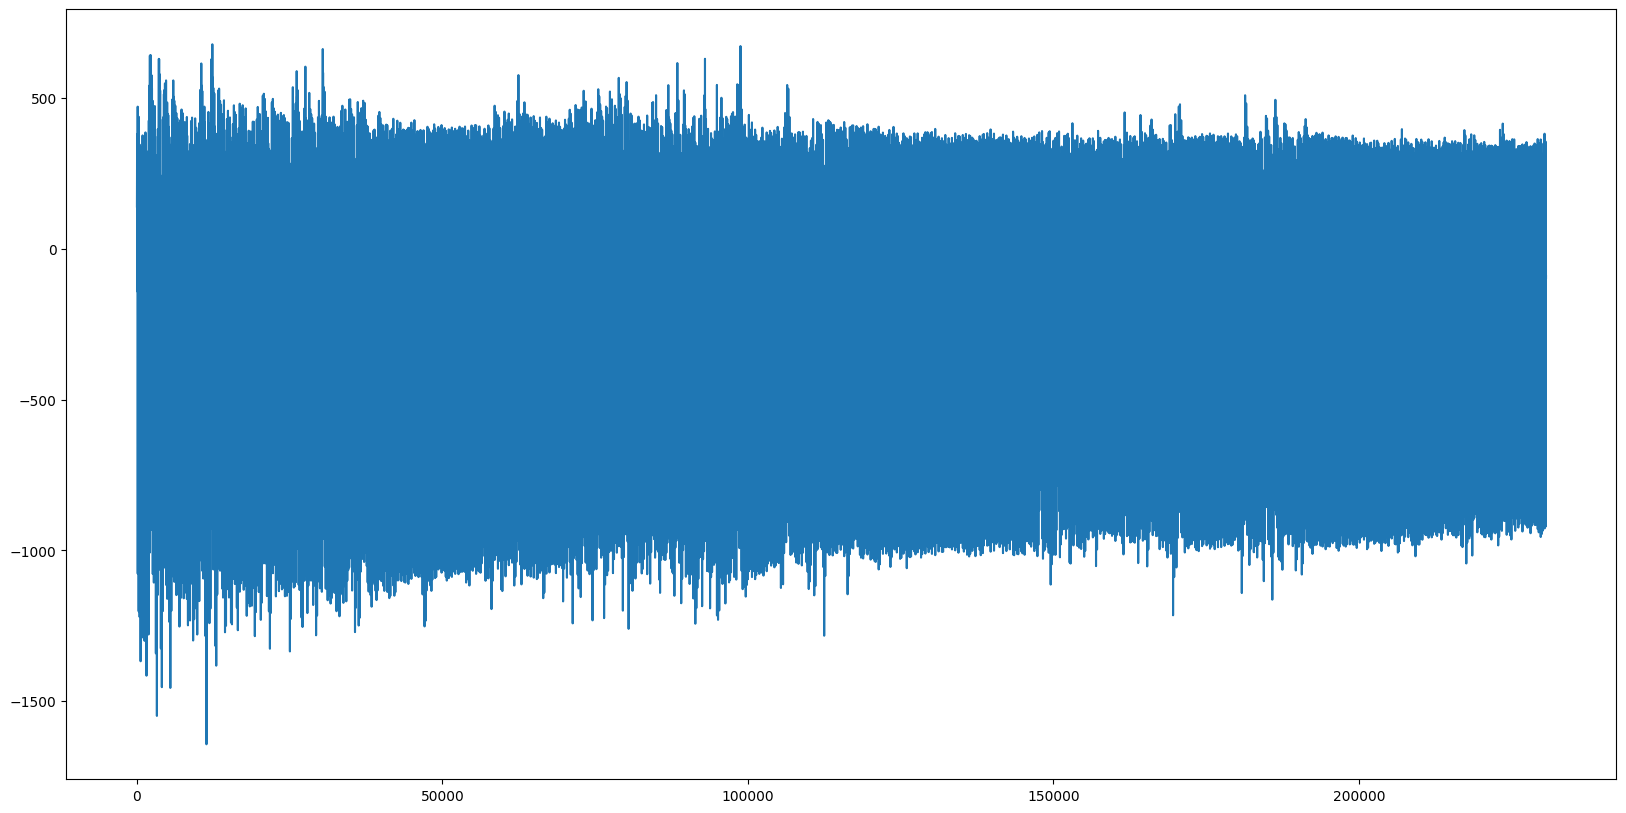

In [15]:
sitting_ecg_filtered = ecg_data_filtering.bandstop_filter(sitting_ecg_concate)

plt.figure(figsize=(20, 10))
plt.plot(sitting_ecg_filtered)
plt.show()

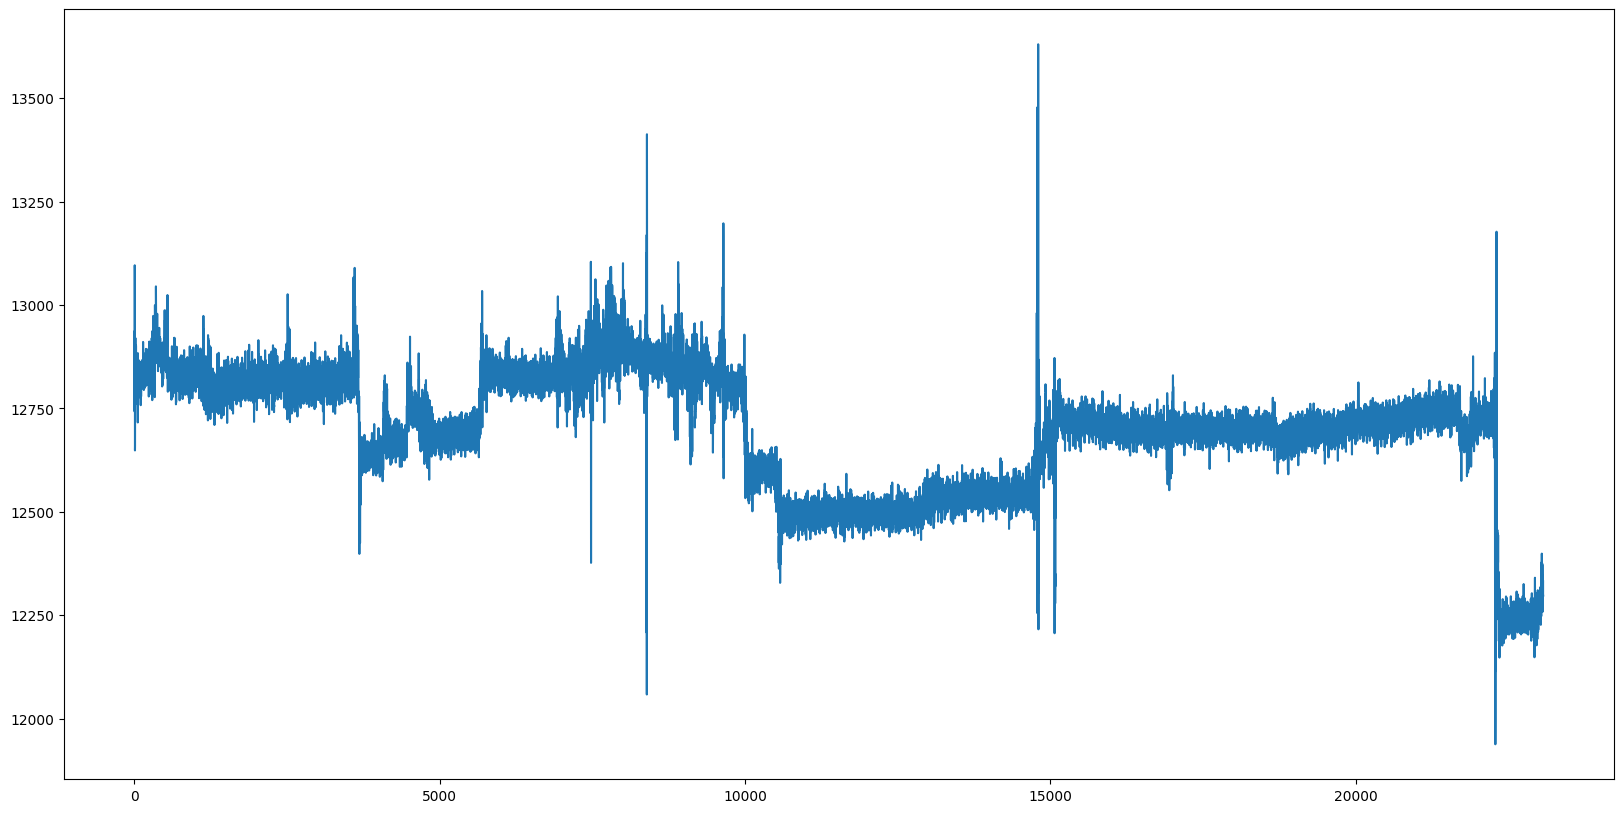

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(sitting_acc_concate)
plt.show()

In [17]:
thirty_sec_sitting_ecg = dataloader.export_ecg_30sec(sitting_ecg_filtered)
thirty_sec_sitting_acc = dataloader.export_acc_30sec(sitting_acc_concate)

for idx in range(len(thirty_sec_sitting_ecg)):
    print(f"{idx}th ECG data shape : ", end='')
    print(np.shape(thirty_sec_sitting_ecg[idx]))

for idx in range(len(thirty_sec_sitting_acc)):
    print(f"{idx}th ACC data shape : ", end='')
    print(np.shape(thirty_sec_sitting_acc[idx]))


0th ECG data shape : (7500,)
1th ECG data shape : (7500,)
2th ECG data shape : (7500,)
3th ECG data shape : (7500,)
4th ECG data shape : (7500,)
5th ECG data shape : (7500,)
6th ECG data shape : (7500,)
7th ECG data shape : (7500,)
8th ECG data shape : (7500,)
9th ECG data shape : (7500,)
10th ECG data shape : (7500,)
11th ECG data shape : (7500,)
12th ECG data shape : (7500,)
13th ECG data shape : (7500,)
14th ECG data shape : (7500,)
15th ECG data shape : (7500,)
16th ECG data shape : (7500,)
17th ECG data shape : (7500,)
18th ECG data shape : (7500,)
19th ECG data shape : (7500,)
20th ECG data shape : (7500,)
21th ECG data shape : (7500,)
22th ECG data shape : (7500,)
23th ECG data shape : (7500,)
24th ECG data shape : (7500,)
25th ECG data shape : (7500,)
26th ECG data shape : (7500,)
27th ECG data shape : (7500,)
28th ECG data shape : (7500,)
0th ACC data shape : (750,)
1th ACC data shape : (750,)
2th ACC data shape : (750,)
3th ACC data shape : (750,)
4th ACC data shape : (750,)


In [18]:
# Sitting ECG
with gzip.open(DATA_EXPORT_PATH + "/sitting_ecg.pkl", "wb") as f:
    pickle.dump(thirty_sec_sitting_ecg, f)

# Sitting ACC
with gzip.open(DATA_EXPORT_PATH + "/sitting_acc.pkl", "wb") as f:
    pickle.dump(thirty_sec_sitting_acc, f)